In [73]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error,mean_squared_error,r2_score

In [50]:
data=pd.read_csv(r"C:\Users\HP\Desktop\extended_airquality_dataset.csv")
data

,ozon,solar,wind,temp,month,day,humidity
0,60.0,300.0,NaN,75,8,6,low
1,NaN,100.0,5.0,64,8,10,high
2,40.0,300.0,5.0,91,5,4,medium
3,40.0,NaN,5.0,61,8,1,high
4,80.0,100.0,NaN,61,5,6,high
5,100.0,250.0,7.5,99,5,1,low
6,40.0,200.0,12.5,95,5,18,low
7,60.0,NaN,10.0,98,5,19,high
8,30.0,200.0,10.0,71,7,5,high
9,50.0,300.0,7.5,78,8,3,high


In [51]:
data.isnull().sum()

ozon        1
solar       4
wind        5
temp        0
month       0
day         0
humidity    0
dtype: int64

In [52]:
data['ozon']=data['ozon'].fillna(data['ozon'].mean())
data['solar']=data['solar'].fillna(data['solar'].mean())
data['wind']=data['wind'].fillna(data['wind'].mean())

In [53]:
encoder=LabelEncoder()
data['humidity']=encoder.fit_transform(data['humidity'])

In [54]:
data.drop_duplicates(inplace=True)

In [55]:
data

,ozon,solar,wind,temp,month,day,humidity
0,60.000000,300.000,9.5,75,8,6,1
1,62.631579,100.000,5.0,64,8,10,0
2,40.000000,300.000,5.0,91,5,4,2
3,40.000000,215.625,5.0,61,8,1,0
4,80.000000,100.000,9.5,61,5,6,0
5,100.000000,250.000,7.5,99,5,1,1
6,40.000000,200.000,12.5,95,5,18,1
7,60.000000,215.625,10.0,98,5,19,0
8,30.000000,200.000,10.0,71,7,5,0
9,50.000000,300.000,7.5,78,8,3,0


In [56]:
data=data[data['wind']>=0]
data=data[(data['month']>=1)&(data['month']<=12)]
data=data[(data['day']>=1)&(data['day']<=31)]

In [57]:
new_cols=['ozon','solar','wind','temp']

In [60]:
for col in new_cols:
    Q1=data[col].quantile(0.25)
    Q3=data[col].quantile(0.75)
    IQR=Q3-Q1
    lowerBound=Q1-1.5*IQR
    upperBound=Q3+1.5*IQR
    data[col]=data[col].clip(lowerBound,upperBound)

In [61]:
x=data[['solar','wind','temp','humidity']]
y=data['ozon']

In [62]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=42)

In [63]:
model=LinearRegression()
model.fit(x_train,y_train)
y_pred=model.predict(x_test)

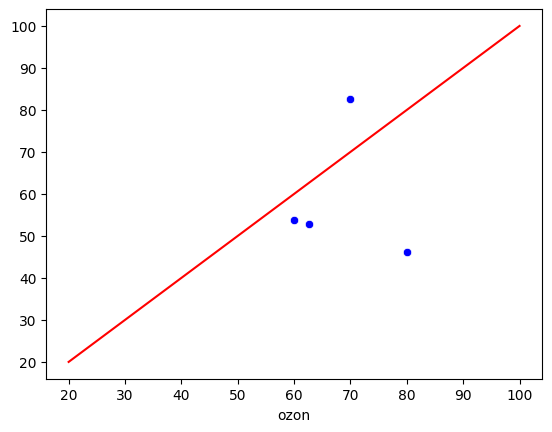

In [67]:
sns.scatterplot(x=y_test,y=y_pred,color='Blue')
plt.plot((y.min(),y.max()),(y.min(),y.max()),color='red')
plt.show()

In [76]:
MAE=mean_absolute_error(y_test,y_pred)
MAE

np.float64(15.64123813939878)

In [77]:
MSE=mean_squared_error(y_test,y_pred)
MSE

np.float64(359.88509470629305)

In [78]:
r2=r2_score(y_test,y_pred)
r2

-4.980138973025167

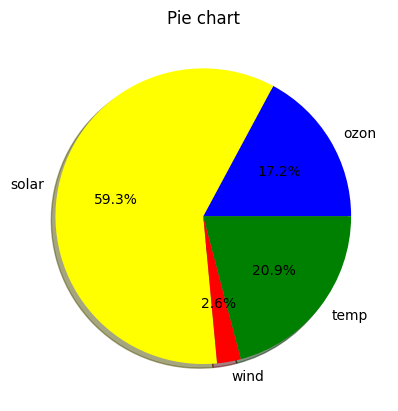

In [85]:
labels=['ozon','solar','wind','temp']
sizes=[data['ozon'].mean(),data['solar'].mean(),data['wind'].mean(),data['temp'].mean()]
colors=['blue','yellow','red','green']
plt.pie(sizes,labels=labels,colors=colors,shadow=True,autopct="%1.1f%%")
plt.title("Pie chart")
plt.show()

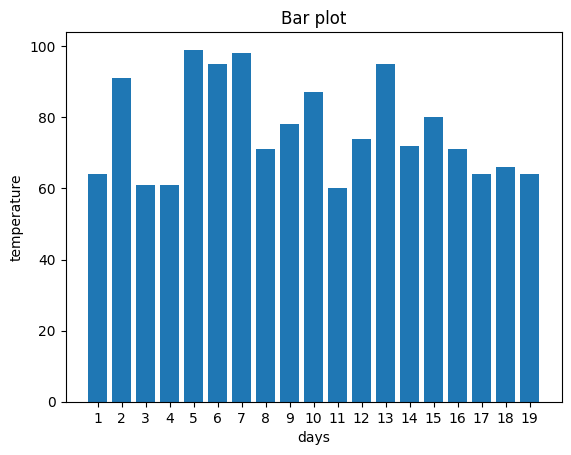

In [112]:
h=data.iloc[1:20,3]
x_pos=np.arange(len(h))
plt.bar(x_pos,h)
v=range(1,20)
plt.xticks(x_pos,v)
plt.title('Bar plot')
plt.xlabel('days')
plt.ylabel('temperature')
plt.show()

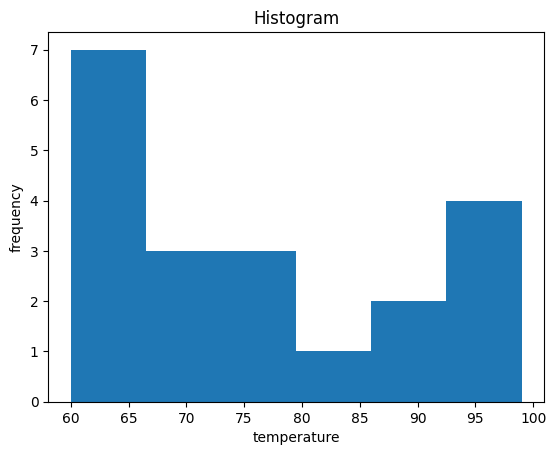

In [113]:
e=data.iloc[:,3]
plt.hist(e,bins='auto')
plt.xlabel('temperature')
plt.ylabel('frequency')
plt.title('Histogram')
plt.show()

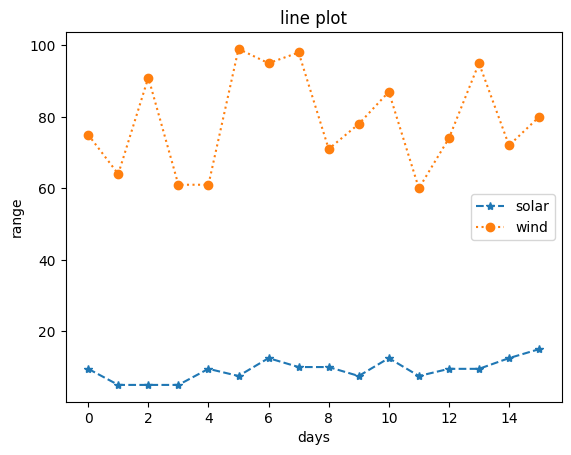

In [114]:
l=data.iloc[:16,2]
m=data.iloc[:16,3]
plt.plot(l,label='solar',marker='*',linestyle='dashed')
plt.plot(m,label='wind',marker='o',linestyle='dotted')
plt.legend()
plt.title('line plot')
plt.xlabel('days')
plt.ylabel('range')
plt.show()

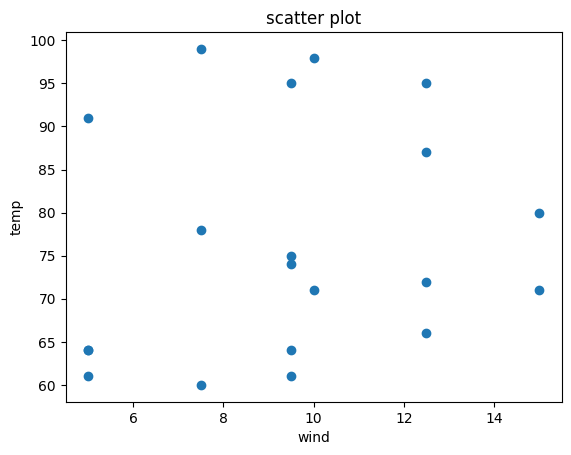

In [115]:
s=data.iloc[:,2]
t=data.iloc[:,3]
plt.scatter(s,t)
plt.title('scatter plot')
plt.xlabel('wind')
plt.ylabel('temp')
plt.show()

<Axes: title={'center': 'temp'}, xlabel='month'>

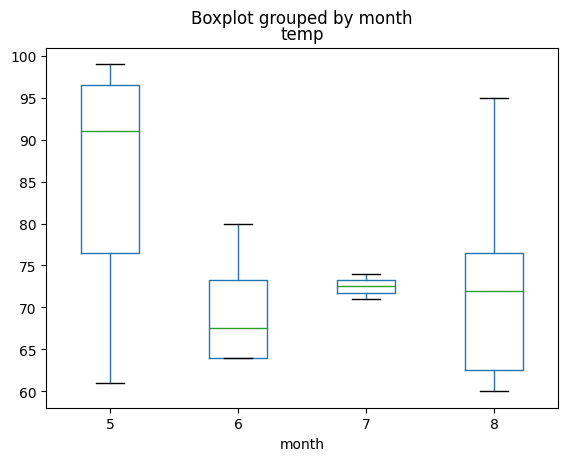

In [107]:
data.boxplot(by='month',column='temp',grid=False)

<Axes: >

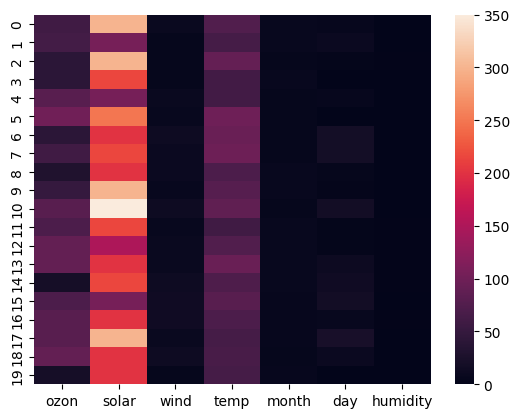

In [109]:
sns.heatmap(data)

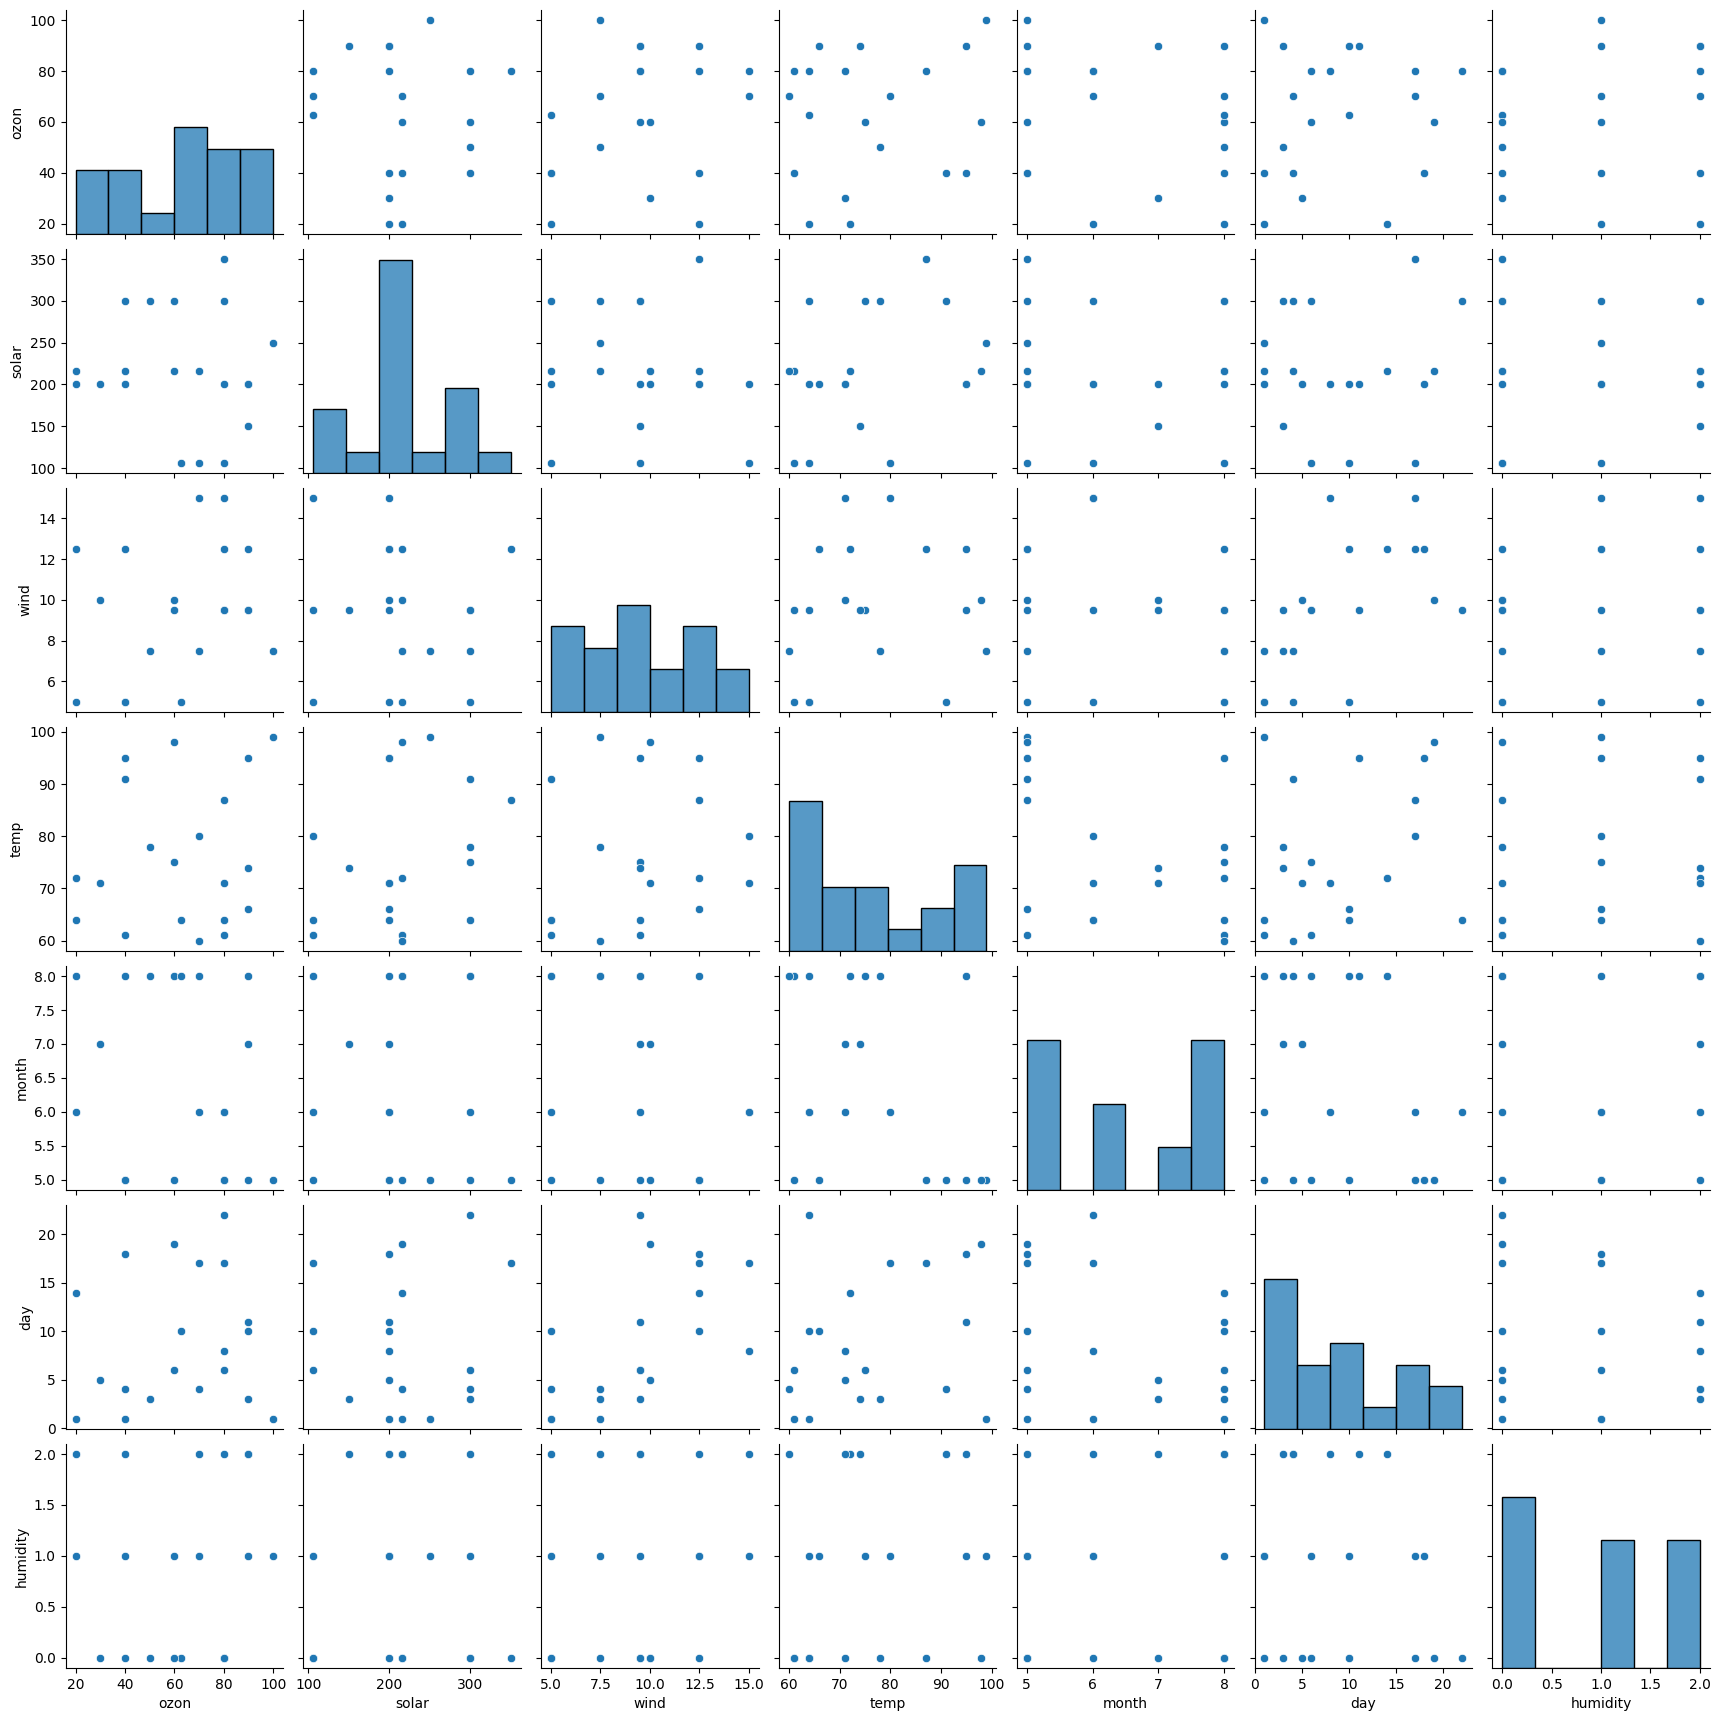

In [111]:
sns.pairplot(data)